# Previsão Diabetes em Mulheres

## Informações do conjunto de dados:
1. Pregnancies: Número de vezes que engravidou
2. Glucose: Concentração plasmática de glicose a 2 horas em um teste oral de tolerância à glicose
3. BloodPressure: Pressão arterial diastólica (mm Hg)
4. SkinThickness: Espessura da dobra da pele do tríceps (milímetro)
5. Insulin: insulina sérica de 2 horas (mu U/ml)
6. BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
7. DiabetesPedigreeFunction: Função pedigree do diabetes
8. Age: Idade (anos)
9. Outcome: Variável de classe (0: não tem diabétes ou 1: tem diabétes)

In [1]:
pip install pandas matplotlib seaborn numpy scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df_original = pd.read_csv('../data/diabetes.csv')
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_original.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
colunas_corrigir = ['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI']

for coluna in colunas_corrigir:
    media = df_original[coluna].replace(0, np.nan).mean()
    df_original[coluna] = df_original[coluna].replace(0, media)

df_original.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.44,12.10,8.79,85.02,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.20,29.15,155.55,32.40,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,155.55,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
df_original.groupby(['Outcome']).size()

Outcome
0    500
1    268
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

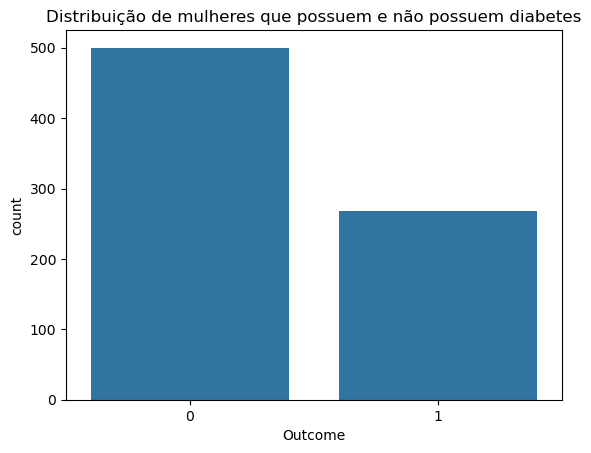

In [8]:
sns.countplot(data=df_original, x='Outcome')
plt.title("Distribuição de mulheres que possuem e não possuem diabetes")
plt.show

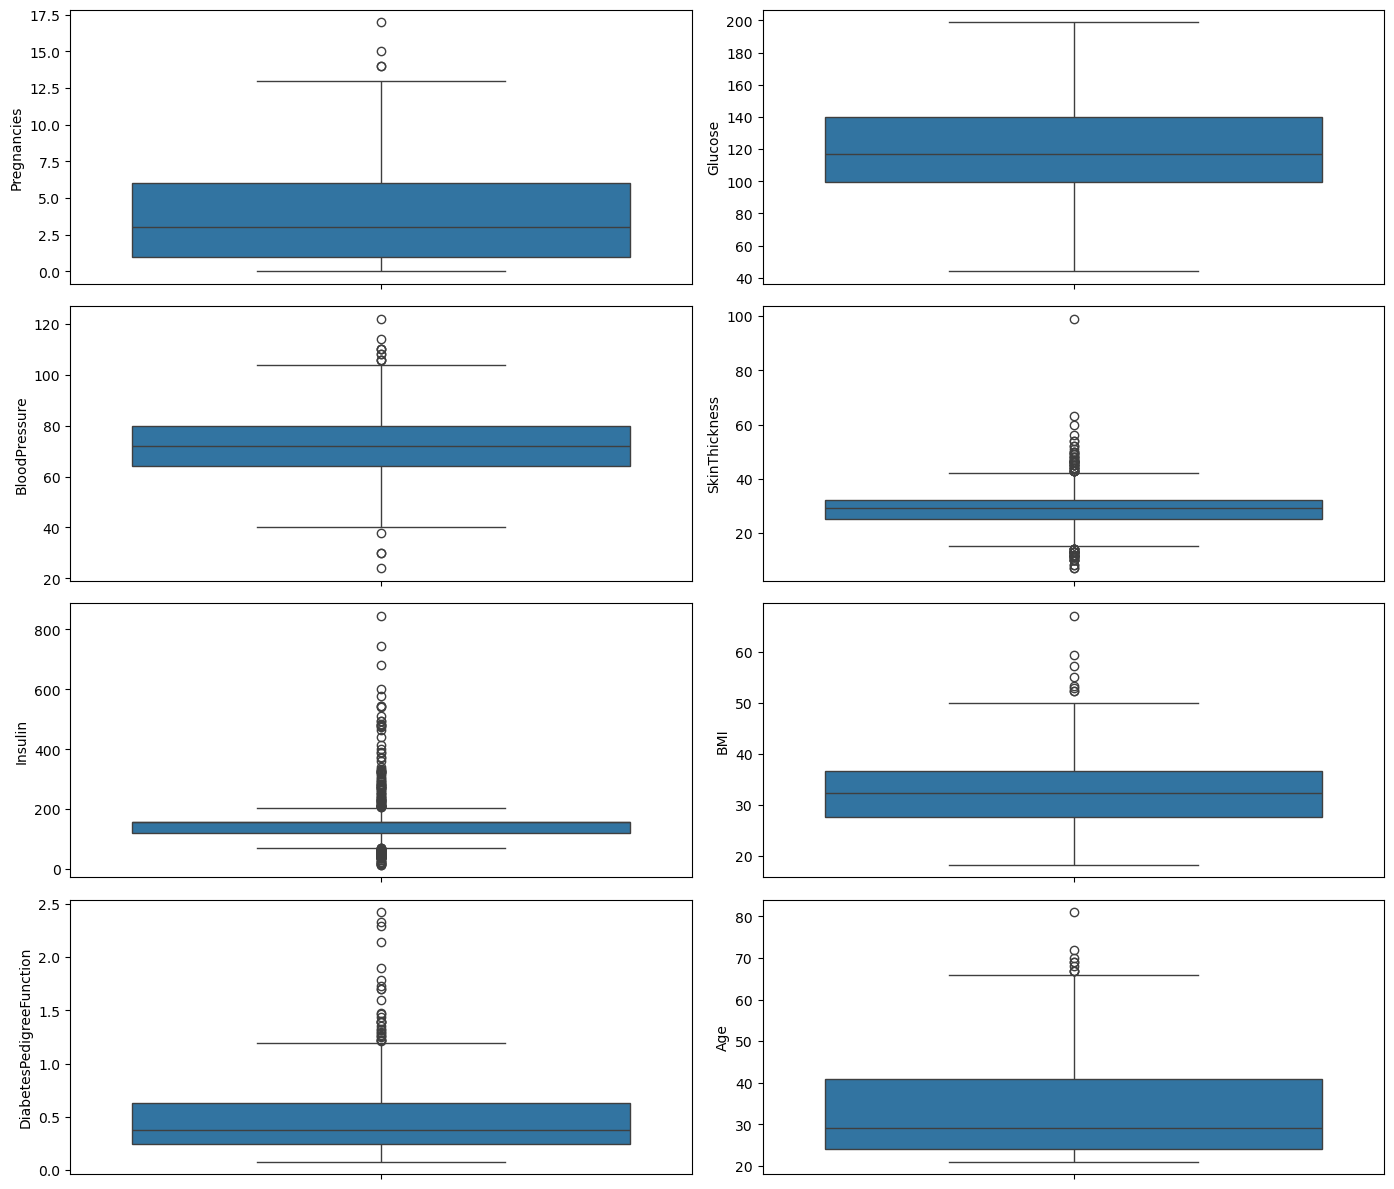

In [9]:
variaveis_numericas = []
for i in df_original.columns[0:8].tolist():
    if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':
        variaveis_numericas.append(i)

plt.rcParams['figure.figsize'] = [14.00,12.00] # Tamanho dos gráficos
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(4,2) # 4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

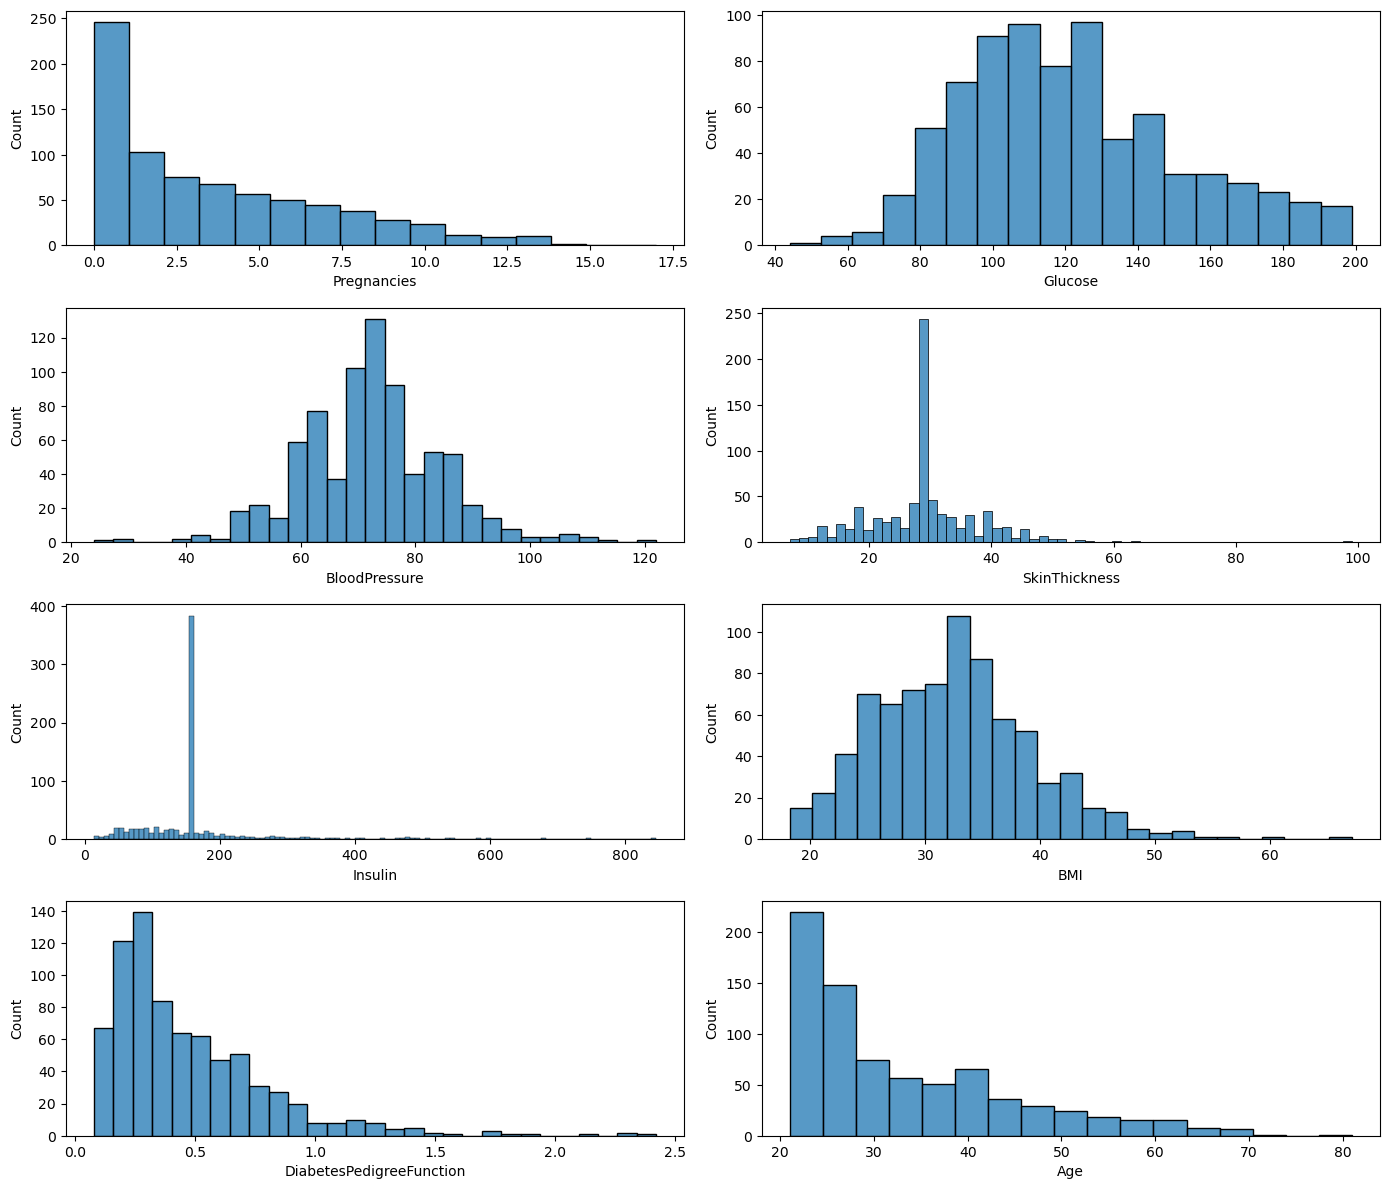

In [10]:
plt.rcParams['figure.figsize'] = [14.00,12.00]
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(4,2)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = df_original, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

In [11]:
variavel_target = df_original.Outcome.value_counts()
variavel_target

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
PREDITORAS = df_original.iloc[:, 0:7]
TARGET = df_original.iloc[:, 8]

In [13]:
balanceador = SMOTE(random_state = 42) # Criando o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET) # Aplicando

In [14]:
TARGET_RES.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [15]:
Xtreino, Xteste, Ytreino, Yteste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size = 0.3, random_state = 42)

In [16]:
Normalizador = MinMaxScaler()
Xtreino_norm = Normalizador.fit_transform(Xtreino)
Xteste_norm = Normalizador.fit_transform(Xteste)

In [17]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators=300, criterion='entropy', max_features='sqrt', min_samples_split=2)

# Construção do modelo
clf = clf.fit(Xtreino_norm, Ytreino)

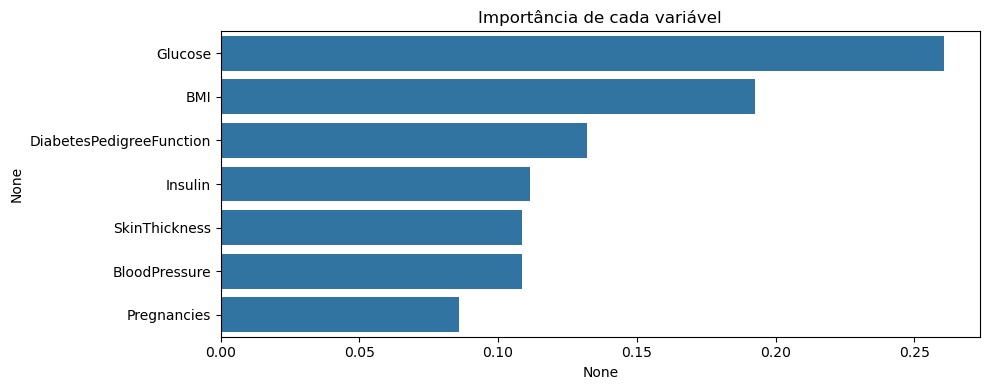

In [18]:
# Exibindo importância de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00, 4.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [19]:
scores = clf.score(Xteste_norm, Yteste)
scores * 100

76.66666666666667

In [24]:
Ypred = clf.predict(Xteste_norm)
print(classification_report(Yteste, Ypred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       149
           1       0.80      0.72      0.76       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



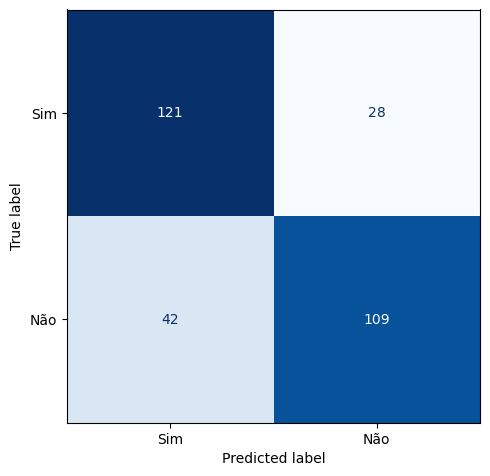

In [31]:
cm = confusion_matrix(Yteste, Ypred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sim","Não"])

plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True

cm_display.plot(include_values=True, cmap='Blues', colorbar=None)

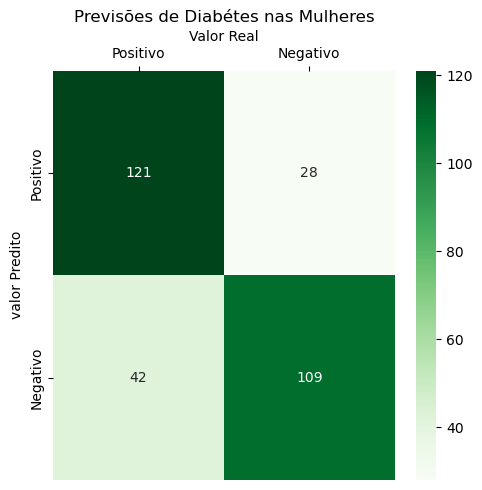

In [32]:
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams["figure.figsize"] = [5.00,5.00]
plt.rcParams["figure.autolayout"] = True

f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(
    cm,
    cmap = 'Greens',
    annot = True,
    cbar_kws={'orientation':'vertical'},
    fmt='.0f',
    xticklabels=['Positivo','Negativo'],
    yticklabels=['Positivo','Negativo']
)

ax.set_ylabel('valor Predito')
ax.set_xlabel('Valor Real')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Previsões de Diabétes nas Mulheres')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom=False, bottom=False, top=True, labeltop=True)
plt.show()